# Import needed libraries 

In [1]:
import numpy as np 
from scipy.spatial.distance import cdist   
import seaborn as sns 
import matplotlib.pyplot as plt 


from sklearn.cluster import KMeans 
from sklearn.metrics.cluster import silhouette_score 

%matplotlib inline

## Classical Clustering

- determine the number of clusters
- randomly initialize the centroids
- measure distances between data points and the centroids >> Fidelity
- assign data points to the nearest centroid
- update the position of the centroid according to the mean of each cluster

# 1. Initialize rabndom centroids 

In [2]:
def Inialize_Random_centroids(X:np.array , k:int)->np.array:
    '''
    inializes K centroids from the data points X that we will find 
    the closest point to it 
    --------------------------------
    X: data points with size (m × n)
    
    K: number of clusters
    -------------------------------- 
    Returns : 
    centroids of clusters
    array_like with shape of (K,n)
    '''
    centroids = X[np.random.choice(X.shape[0], k ,replace = False)]
    return centroids 

# 2.Calculate distance 
_**between each data point and predetermined centroids**

In [3]:
def Calculate_distance(X: np.array , k:int ,centroids:np.array)->np.array:
    '''
    Computes the distance between every data point and the centroids
    -------------------------------
    X: data points in shape (m ,n)
    
    K: number of clusters
    
    centroids: array_like in shape (K,n)
    ---------------------------------
    Returns: 
    
    distance: array_like in the shape of(m , k)
    '''
    distances = np.zeros((X.shape[0],k))
    for i in range(k):
        distances[:,i] =((X-centroids[i])**2).sum(axis=1)**0.5
        #or we can use cdist function from scipy library 
        #dist = cdist(X, centeroids) 
        
    return distances     

# 3.Assign each point to a cluster 
_**based on the distance between it and the nearest centroid**

In [4]:
def find_closet_Centroid(distances:np.array)->np.array:
    '''
    assign each data point to the nearest cluster 
    -------------------------------------
    distances: array with shape of (m,k)
    holds distance between each data point and each centoid 
    ----------------------
    Returns: 
    idx: holds the centroids assignment for each
        example (row) in the dataset X.
        in the shape of (m,1)
    
    '''
    idx = np.argmin(distances , axis = 1)
    return idx 

# 4.Update centroids:


In [5]:
def update_Centroids(centroids:np.array,idx:np.array,K:int)->np.array:
    '''
    recalculate centroids of each cluster by computimg average
    of the data points assigned to it 
    -------------------------
    centroids: array with shape(k,n) holds centroids of each cluster
    
    idx:holds the centroids assignment for each
        example (row) in the dataset X.
        in the shape of (m,1)
        
    k: number of clusters 
    -----------------------
    Retrurns: 
    updated centroids with shape (K,n)
    '''
    for i in range(k):
        centroids[i,:] = X[idx == i].mean(axis=0)

In [6]:
def predict(centroids:np.array,x:int)->np.array:
    '''
    predicts which cluster a new data point will be assigned 
    -------------------
    centroids: array with shape(k,n) holds centroids of each cluster
    
    x: data point 
    ----------------------------
    Returns:
    label of the cluster the point assigned to 
    '''
    dist = np.sum((x - centroids)**2 ,axis = 1)
    label = np.argmin(dist)
    return label

# kMeans function

In [7]:
def k_means(X:np.array,K:int)->np.array:
    '''
    a simple function to apply kmeans algorithm 
    ------------------------------------------
     X : data points with shape(m,n)
     
     k : number of clusters 
     ----------------------------
     Returns :
     centroids: array with shape(k,n) , centroids of each cluster 
     
     idx: lables of cluster that each point assigned to 
     array with shape of(m,1)
    '''
    m = X.shape[0]
    center = X[np.random.choice(m ,K , replace = False)]
    idx = np.zeros(m).astype(int)
    
    while True:
        init_idx = idx.copy()
        dist =cdist(X , center)
        idx = np.argmin(dist , axis=1)
        
        for i in range(K):
            center[i,:] = X[idx == i].mean(axis=0)
        
        if all(init_idx == idx):
            break
            
    return centroids, idx

In [8]:
def kmeans(X:np.array, k:int, max_iter:int = 300)->np.array:
    '''
    another version of kmeans function
    '''
    centroids = Inialize_Random_centroids(X, k)
    
    for _ in range(max_iter):
        labels = find_closet_Centroid(X, centroids)
        updated_centroids =updateCentroids(X, labels, k)
        if np.array_equal(centroids , new_centroids):
            break
        centroids = updated_centroids
        
    return labels, centroids

# Example:

#### generate random data set 

In [9]:
np.random.seed(42)
X =np.random.random(500).reshape(-1,1)
y = np.random.random(500).reshape(-1,1)
X.shape

(500, 1)

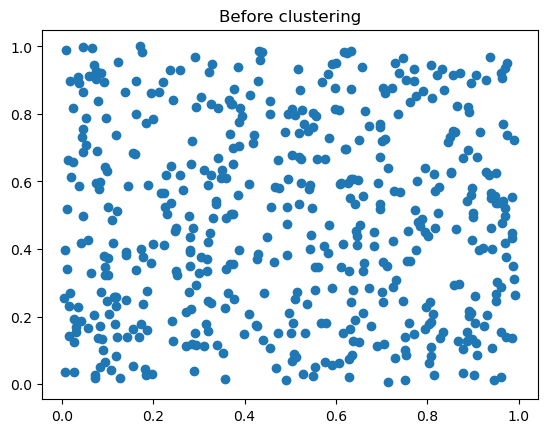

In [10]:
plt.scatter(X , y)
plt.title('Before clustering')
plt.show();

#### determine number of clusters and initialize random centroids

In [11]:
k = 2 
centroids = Inialize_Random_centroids(X , k)
centroids , centroids.shape 

(array([[0.03438852],
        [0.52224326]]),
 (2, 1))

#### calculate distance between each data point and random centroids 

In [12]:
distances = Calculate_distance(X,k , centroids) 
distances , distances.shape

(array([[3.40151598e-01, 1.47703141e-01],
        [9.16325785e-01, 4.28471046e-01],
        [6.97605421e-01, 2.09750682e-01],
        [5.64269963e-01, 7.64152241e-02],
        [1.21630119e-01, 3.66224620e-01],
        [1.21605999e-01, 3.66248740e-01],
        [2.36950911e-02, 4.64159648e-01],
        [8.31787625e-01, 3.43932886e-01],
        [5.66726491e-01, 7.88717517e-02],
        [6.73684057e-01, 1.85829318e-01],
        [1.38040268e-02, 5.01658766e-01],
        [9.35521331e-01, 4.47666592e-01],
        [7.98054120e-01, 3.10199381e-01],
        [1.77950590e-01, 3.09904149e-01],
        [1.47436446e-01, 3.40418293e-01],
        [1.49015989e-01, 3.38838750e-01],
        [2.69853722e-01, 2.18001017e-01],
        [4.90367911e-01, 2.51317158e-03],
        [3.97556498e-01, 9.02982414e-02],
        [2.56840619e-01, 2.31014120e-01],
        [5.77464374e-01, 8.96096347e-02],
        [1.05105340e-01, 3.82749399e-01],
        [2.57756127e-01, 2.30098612e-01],
        [3.31973322e-01, 1.5588141

#### assign each data point to the cluster with nearest centroid

In [13]:
labels = find_closet_Centroid(distances).reshape(-1,1)
labels , labels.shape

(array([[1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],

#### update centroids of each cluster 

In [14]:
update_Centroids(centroids,labels,k)

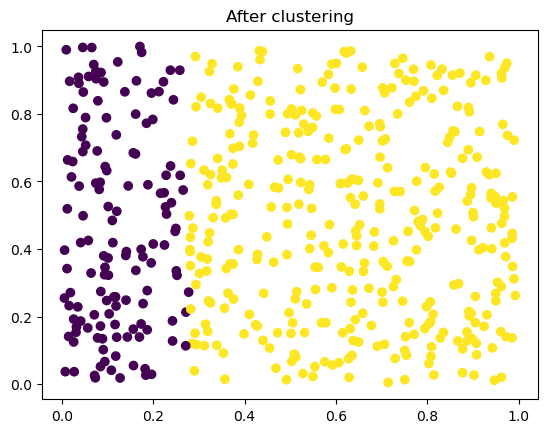

In [15]:
plt.scatter(X , y , c= labels)
plt.title('After clustering')
plt.show();

### using different number of cluster 

In [16]:
centroids , labels = k_means(X , 4) 

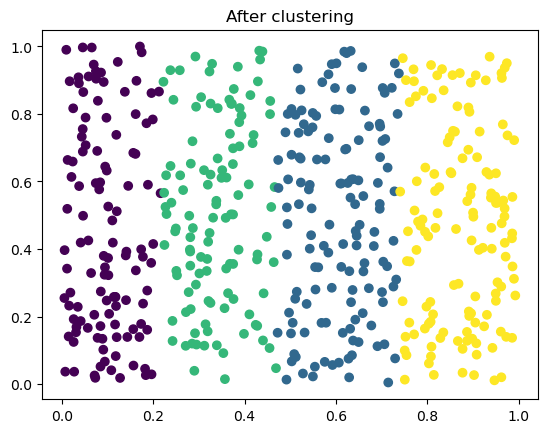

In [17]:
plt.scatter(X , y , c= labels)
plt.title('After clustering')
plt.show();

In [18]:
label = predict(centroids , X[1])
label

1

## Using built_in kmeans class kmeans from sklearn lib

In [19]:
Kmeans = KMeans(n_clusters = k)
y_hat = Kmeans.fit_predict(X) 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


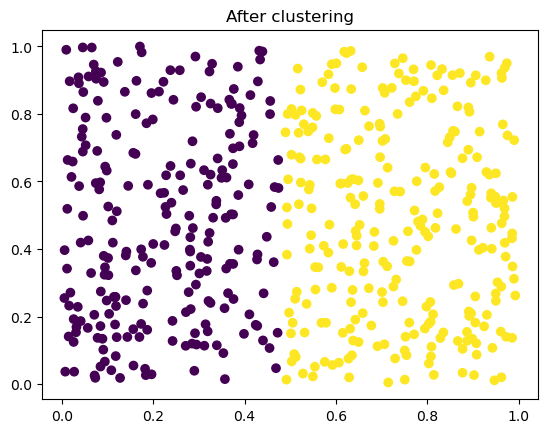

In [20]:
plt.scatter(X , y , c= Kmeans.labels_)
plt.title('After clustering')
plt.show();

## Quantum Clustering

- determine the number of clusters
- randomly initialize the centroids
- measure distances between data points and the centroids >> Fidelity
  - Initialize three separable states in the ground state. One is for the data point and the other two represent the centroid.
  - choose your encoding scheme
  - using a for loop you will pick a classical point to measure the distance between the centroids and this sample.
  - encode the data using the encoding scheme (rotational gates)
  - apply the selected rotational gates on the states
  - then calculate the fidelity between the two states (one state would represent the data point and the other would represent the centroid
- assign data points to the nearest centroid
- update the position of the centroid according to the mean of each cluster

***

In [21]:
from qiskit.circuit.library import RYGate 

In [22]:
def init_state()->np.array:
    '''
    initialize states in the ground state
    '''
    return np.array([[1],[0]])


In [23]:
def encode_data(X:np.array)->np.array:
    '''
    encode data point into quantum states
    ---------------------------------
    X: all data points
    ------------------
    Returns: 
    array of states represents the points 
    '''
    q_data_points = []
    for i in range(X.shape[0]):
        groundState = init_state()
        ry = RYGate(float(X[i])).to_matrix()
        evovled_state = ry @ groundState
        q_data_points.append(evovled_state) 

    return np.array(q_data_points).reshape(-1,2)

# 1.Initialize separable states in the ground state.

In [24]:
q_points = encode_data(X)
q_points , q_points.shape

(array([[0.98251615+0.j, 0.18617738+0.j],
        [0.88912933+0.j, 0.45765603+0.j],
        [0.93376743+0.j, 0.35788041+0.j],
        [0.9555345 +0.j, 0.29487934+0.j],
        [0.99695882+0.j, 0.07793022+0.j],
        [0.99695976+0.j, 0.0779182 +0.j],
        [0.99957832+0.j, 0.02903772+0.j],
        [0.90767409+0.j, 0.41967576+0.j],
        [0.95517159+0.j, 0.29605277+0.j],
        [0.93798103+0.j, 0.34668658+0.j],
        [0.99994704+0.j, 0.01029207+0.j],
        [0.88469596+0.j, 0.46616848+0.j],
        [0.91462321+0.j, 0.40430728+0.j],
        [0.9943693 +0.j, 0.10597021+0.j],
        [0.99587031+0.j, 0.0907873 +0.j],
        [0.99579829+0.j, 0.09157378+0.j],
        [0.98845188+0.j, 0.1515351 +0.j],
        [0.96577585+0.j, 0.25937811+0.j],
        [0.97676845+0.j, 0.21429745+0.j],
        [0.98941692+0.j, 0.14510052+0.j],
        [0.95356834+0.j, 0.30117674+0.j],
        [0.99756867+0.j, 0.0696904 +0.j],
        [0.98935039+0.j, 0.14555342+0.j],
        [0.98326924+0.j, 0.1821581

In [25]:
q_centroids = Inialize_Random_centroids(q_points , k)
q_centroids , q_centroids.shape

(array([[0.99565451+0.j, 0.09312413+0.j],
        [0.98924481+0.j, 0.14626927+0.j]]),
 (2, 2))

# 2.Calculate fidelity 

The Fidelity between two quantum states is calculated using the following expression: |⟨𝜓|𝜙⟩|2=|⟨𝜙|𝜓⟩|2

𝑐𝑜𝑠(𝜃/2)|0⟩+𝑠𝑖𝑛(𝜃/2)𝑒𝑖𝜙|1⟩

In [27]:
fid = calc_fid(q_points[0] , q_centroids[0])
fid 

0.9955842380024997

In [28]:
def fidelity(state1, state2):
    """
    another version using the equation 
   ----------------------------------------------
        - Quantum state 1: numpy array, shape (n, 1)
        - Quantum state 2: numpy array, shape (n, 1)
    """
    inner_product = np.abs(np.vdot(state1, state2)) ** 2
    fidelity = np.real(inner_product)
    return fidelity

In [29]:
fid2 = fidelity(q_points[0] ,q_centroids[0])
fid2 

0.991187974959018

#  3.assign data points to the nearest centroid 
_**based on max fidelity**  

In [30]:
def closest_centeroids(q_points , q_centroids):
    indices = []
    fideliy_list = []   
    
    for q_point in q_points :
        fidelty_to_cen = []
        for i in range(len(q_centroids)):
            fidelty_to_cen.append(fidelity(q_point, q_centroids[i].reshape(q_point.shape)))
            
        fideliy_list.append(fidelty_to_cen)
        
    for fidelty_to_cen in fideliy_list :
        indices.append(fidelty_to_cen.index(max(fidelty_to_cen)))
        
    indices = np.array(indices)
    
    return indices 

In [31]:
indx = closest_centeroids(q_points , q_centroids)

In [32]:
indx.reshape(-1,1) , indx.shape

(array([[1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],

# 4.Update centroids 

In [33]:
def updateCentroids( q_points ,q_centroids ,indices , k):
    
    if q_centroids is None:
        q_centroids = np.zeros((k, q_points.shape[1]))  # Initialize centroids if None
        
    for i in range(k):
        q_centroids[i,:] = q_points[indices == i].mean(axis=0)
        
    return q_centroids    

In [34]:
updateCentroids( q_points , q_centroids, indx , k)

array([[0.99804882+0.j, 0.05321039+0.j],
       [0.94509833+0.j, 0.30757504+0.j]])

In [35]:
q_centroids , q_centroids.shape ,len(q_centroids)

(array([[0.99804882+0.j, 0.05321039+0.j],
        [0.94509833+0.j, 0.30757504+0.j]]),
 (2, 2),
 2)

# Quantum_kmeans function

In [36]:
def Quantum_Kmeans(X, k , max_iterations = 300):
    init_centroids = Inialize_Random_centroids(X , k)
    quantum_data_points = encode_data(X)
    quantum_centroids = encode_data(init_centroids)
    
    for i in range(max_iterations):
        labels = closest_centeroids(quantum_data_points , quantum_centroids)
        updated_centroids = updateCentroids(quantum_data_points , quantum_centroids , labels , k)
        if np.array_equal(quantum_centroids , updated_centroids):
            break
        quantum_centroids = updated_centroids
      
    return labels , quantum_centroids 

In [37]:
x_quantum_points = encode_data(X)
y_quantum_points = encode_data(y)

In [38]:
x_quantum_points.shape

(500, 2)

C:\Users\hp\anaconda3\Lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


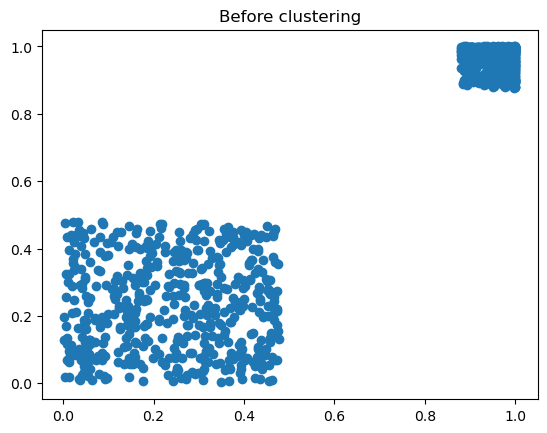

In [39]:
plt.scatter(x_quantum_points, y_quantum_points)
plt.title('Before clustering')
plt.show();

In [40]:
quantum_labels , quantum_centroids = Quantum_Kmeans(X , 2 ,1000) 

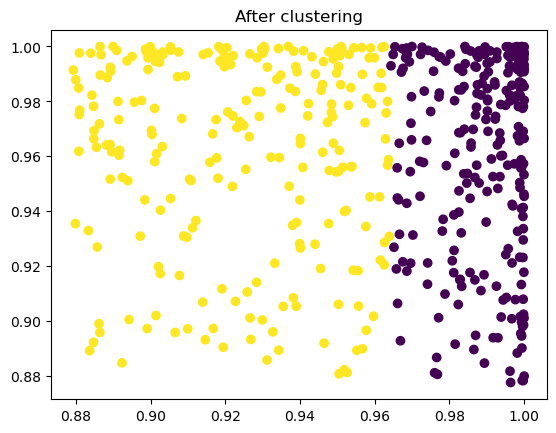

In [41]:
plt.scatter(x_quantum_points[:,0], y_quantum_points[:,0], c = quantum_labels.reshape(-1,1))
plt.title('After clustering')
plt.show();

In [42]:
quantum_labels , quantum_labels.shape

(array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 

In [43]:
label = predict(quantum_centroids , q_points[-1])

In [44]:
label 

1